<a href="https://colab.research.google.com/github/UnitForDataScience/Mini_Workshops/blob/main/Clustering_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [ ]:
# Data load

url = 'https://raw.githubusercontent.com/djlittle/Homelessness_Clustering_Comparisons/master/Data/HMIS%20Data%20Extract.csv'

dat = pd.read_csv(url) # Importing data

print(dat.head())

   personalid  ...  projecttype_14_count
0         342  ...                   2.0
1         401  ...                   1.0
2         402  ...                   1.0
3         424  ...                   NaN
4         438  ...                   NaN

[5 rows x 13 columns]


In [ ]:
# Dataframe manipulation and nan handling

df = dat.iloc[:, 1:]
df.fillna(-1, inplace=True) # Filling null values of the data frame with -1. 

print(df.head())

   projecttype_1_bednights  ...  projecttype_14_count
0                     91.0  ...                   2.0
1                      2.0  ...                   1.0
2                     -1.0  ...                   1.0
3                      5.0  ...                  -1.0
4                    220.0  ...                  -1.0

[5 rows x 12 columns]


In [ ]:
# Kmeans 

from sklearn.cluster import KMeans

start = time.time()
kmeans = KMeans(n_clusters=10, verbose=True, n_jobs=-1).fit(df) # Model fitting
kmeans_labels = kmeans.labels_ + 1  # Label assignment
end = time.time()

processing_time = (end - start) # Computing processing time

dat['kmeans'] = kmeans_labels # Attaching labels to original dataframe

print('Kmeans model complete')
print('Processing time: '+ str(processing_time) + ' seconds')

Kmeans model complete
Processing time: 2.42657208442688 seconds


Beginning k = 2
Beginning k = 3
Beginning k = 4
Beginning k = 5
Beginning k = 6
Beginning k = 7
Beginning k = 8
Beginning k = 9
Beginning k = 10
Beginning k = 11
Beginning k = 12
Beginning k = 13
Beginning k = 14
Beginning k = 15
Beginning k = 16
Beginning k = 17
Beginning k = 18
Beginning k = 19
Beginning k = 20
Beginning k = 21
Beginning k = 22
Beginning k = 23
Beginning k = 24
Beginning k = 25
Beginning k = 26
Beginning k = 27
Beginning k = 28
Beginning k = 29


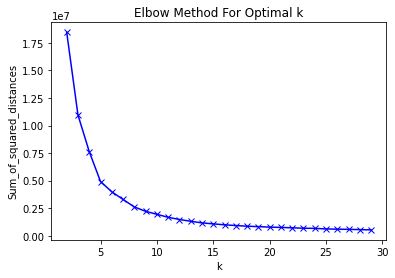

In [ ]:
from matplotlib import pyplot as plt  # Import for graphing

# Elbow method for assessing k number of clusters
wcss = [] # Null dataframe to store sum of squared distances
K = range(2, 30)  # Range to assess
for k in K:
    print("Beginning k = " + str(k))
    kmeans_k = KMeans(n_clusters=k, n_jobs=None).fit(df) # Fitting to k number of clusters
    wcss.append(kmeans_k.inertia_) # Storing data

# Elbow methog graphing
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()